# Clustering

# K-Mean Clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# create data set

# cluster-1
x1 = np.random.normal(25, 5, 1000)
y1 = np.random.normal(25, 5, 1000)

# cluster-2
x2 = np.random.normal(55, 5, 1000)
y2 = np.random.normal(60, 5, 1000)

# cluster-3
x3 = np.random.normal(55, 5, 1000)
y3 = np.random.normal(15, 5, 1000)

x = np.concatenate((x1, x2, x3), axis = 0)
y = np.concatenate((y1, y2, y3), axis = 0)

dictionary = {"x" : x, "y" : y}

data = pd.DataFrame(dictionary)
data.head()

,x,y
0,26.291813,20.632868
1,28.529190,19.091949
2,29.474703,26.683128
3,13.491875,25.171319
4,28.297445,25.789626


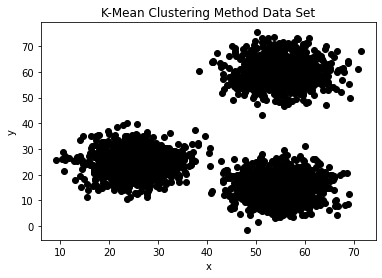

In [3]:
plt.figure()
plt.scatter(x1, y1, color ="black")
plt.scatter(x2, y2, color ="black")
plt.scatter(x3, y3, color ="black")
plt.xlabel("x")
plt.ylabel("y")
plt.title("K-Mean Clustering Method Data Set")
plt.show()

# Choosing K Value

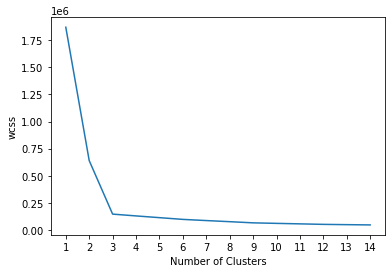

In [4]:
from sklearn.cluster import KMeans
wcss = []

for k in range(1, 15):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

plt.figure()
plt.plot(range(1, 15), wcss)
plt.xticks(range(1,15))
plt.xlabel("Number of Clusters")
plt.ylabel("wcss")
plt.show()

for K = 3, we approach best cluster number, 3-Means Clustering Method

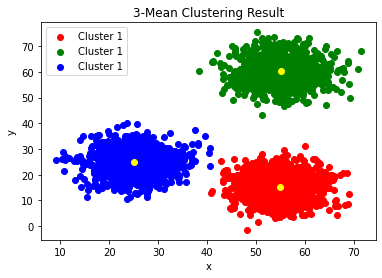

In [5]:
k_mean = KMeans(n_clusters = 3)
clusters = k_mean.fit_predict(data)

data["label"] = clusters

plt.figure()
plt.scatter(data.x[data.label == 0], data.y[data.label == 0], color = "red", label = "Cluster 1")
plt.scatter(data.x[data.label == 1], data.y[data.label == 1], color = "green", label = "Cluster 1")
plt.scatter(data.x[data.label == 2], data.y[data.label == 2], color = "blue", label = "Cluster 1")
plt.scatter(k_mean.cluster_centers_[:,0],k_mean.cluster_centers_[:,1], color = "yellow")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("3-Mean Clustering Result")
plt.show()

# Hierarchical Clustering

In [6]:
# create data set

# cluster-1
x1 = np.random.normal(25, 5, 20)
y1 = np.random.normal(25, 5, 20)

# cluster-2
x2 = np.random.normal(55, 5, 20)
y2 = np.random.normal(60, 5, 20)

# cluster-3
x3 = np.random.normal(55, 5, 20)
y3 = np.random.normal(15, 5, 20)

x = np.concatenate((x1, x2, x3), axis = 0)
y = np.concatenate((y1, y2, y3), axis = 0)

dictionary = {"x" : x, "y" : y}

data = pd.DataFrame(dictionary)
data.head()

,x,y
0,17.526092,23.266976
1,25.792104,25.778539
2,16.237839,33.310673
3,27.327118,26.049418
4,30.218226,24.550174


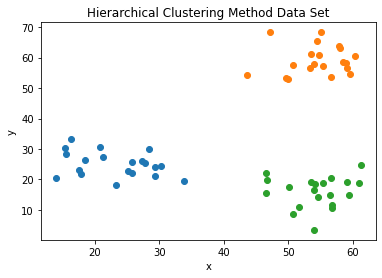

In [7]:
plt.figure()
plt.scatter(x1, y1)
plt.scatter(x2, y2)
plt.scatter(x3, y3)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Hierarchical Clustering Method Data Set")
plt.show()

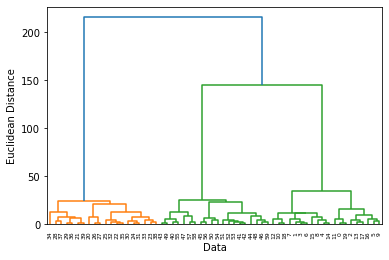

In [8]:
# dendrogram
from scipy.cluster.hierarchy import linkage, dendrogram

merg = linkage(data, method = "ward")
dendrogram(merg, leaf_rotation = 90)
plt.xlabel("Data")
plt.ylabel("Euclidean Distance")
plt.show()

Hierarchical Clustering Algorithm

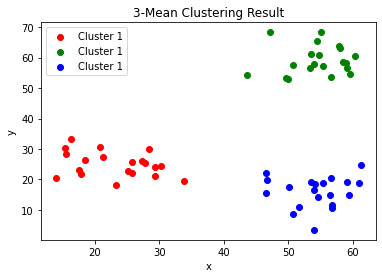

In [9]:
from sklearn.cluster import AgglomerativeClustering
hier_clust = AgglomerativeClustering(n_clusters = 3, affinity = "euclidean", linkage = "ward")
cluster = hier_clust.fit_predict(data)

data["label"] = cluster

plt.figure()
plt.scatter(data.x[data.label == 0], data.y[data.label == 0], color = "red", label = "Cluster 1")
plt.scatter(data.x[data.label == 1], data.y[data.label == 1], color = "green", label = "Cluster 1")
plt.scatter(data.x[data.label == 2], data.y[data.label == 2], color = "blue", label = "Cluster 1")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("3-Mean Clustering Result")
plt.show()

# Principal Component Analysis

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# sklearn iris data set 
from sklearn.datasets import load_iris

In [11]:
iris = load_iris()

data = iris.data
feature_names = iris.feature_names
y = iris.target

df = pd.DataFrame(data, columns = feature_names)
df["class_"] = y
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class_
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2, whiten = True) # whitten = normalize
pca.fit(data)

x_pca = pca.transform(data)

print("Variance Ratio: ", pca.explained_variance_ratio_)

print("Sum: ", sum(pca.explained_variance_ratio_))

Variance Ratio:  [0.92461872 0.05306648]
Sum:  0.977685206318795


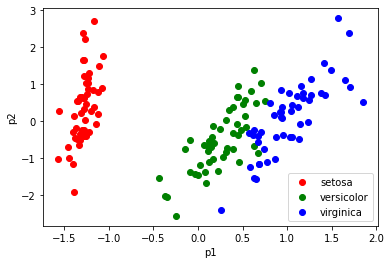

In [13]:
# PCA Visualization
df["p1"] = x_pca[:, 0]
df["p2"] = x_pca[:, 1]

color = ["red", "green", "blue"]

for each in range(3):
    plt.scatter(df.p1[df.class_ == each], df.p2[df.class_ == each], color = color[each], label = iris.target_names[each])
    
plt.legend()
plt.xlabel("p1")
plt.ylabel("p2")
plt.show()

In [14]:
# PCA and Kernel PCA comparison sample
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

X, y = make_circles(n_samples = 1_000, factor = 0.3, noise = 0.05, random_state = 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 0)

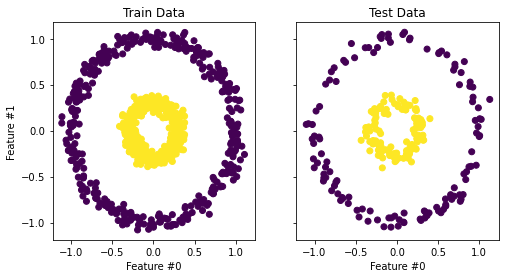

In [15]:
import matplotlib.pyplot as plt

_, (train_ax, test_ax) = plt.subplots(ncols = 2, sharex = True, sharey = True, figsize = (8,4))

train_ax.scatter(X_train[:, 0], X_train[:, 1], c = y_train)
train_ax.set_ylabel("Feature #1")
train_ax.set_xlabel("Feature #0")
train_ax.set_title("Train Data")

test_ax.scatter(X_test[:, 0], X_test[:, 1], c = y_test)
test_ax.set_xlabel("Feature #0")
_ = test_ax.set_title("Test Data")

In [16]:
from sklearn.decomposition import PCA, KernelPCA

pca = PCA(n_components = 2)
kernel_pca = KernelPCA(n_components = None, kernel = "rbf", gamma = 10, fit_inverse_transform = True, alpha = 0.1)

X_test_pca = pca.fit(X_train).transform(X_test)
X_test_kernel_pca = kernel_pca.fit(X_train).transform(X_test)

Text(0.5, 1.0, 'Projection of Test Data with \n KernelPCA')

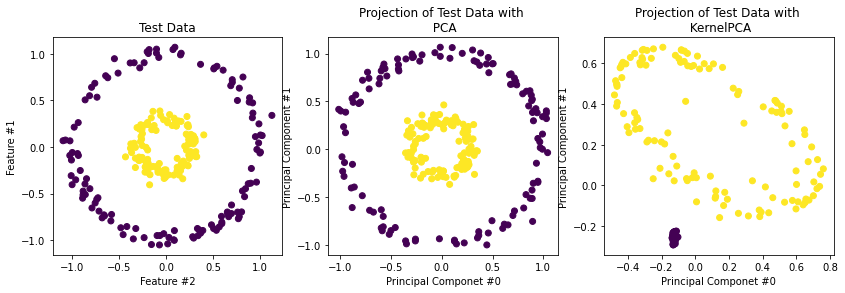

In [17]:
fig, (orig_data_ax, pca_proj_ax, kernel_pca_proj_ax) = plt.subplots(ncols = 3, figsize = (14, 4))

orig_data_ax.scatter(X_test[:, 0], X_test[:, 1], c = y_test)
orig_data_ax.set_ylabel("Feature #1")
orig_data_ax.set_xlabel("Feature #2")
orig_data_ax.set_title("Test Data")

pca_proj_ax.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c = y_test)
pca_proj_ax.set_ylabel("Principal Component #1")
pca_proj_ax.set_xlabel("Principal Componet #0")
pca_proj_ax.set_title("Projection of Test Data with \n PCA")

kernel_pca_proj_ax.scatter(X_test_kernel_pca[:, 0], X_test_kernel_pca[:, 1], c = y_test)
kernel_pca_proj_ax.set_ylabel("Principal Component #1")
kernel_pca_proj_ax.set_xlabel("Principal Componet #0")
kernel_pca_proj_ax.set_title("Projection of Test Data with \n KernelPCA")

In [18]:
# reconstruction
X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
X_reconstructed_kernel_pca = kernel_pca.inverse_transform(kernel_pca.transform(X_test))

Text(0.5, 1.0, 'Projection of Backward Test Data with \n KernelPCA')

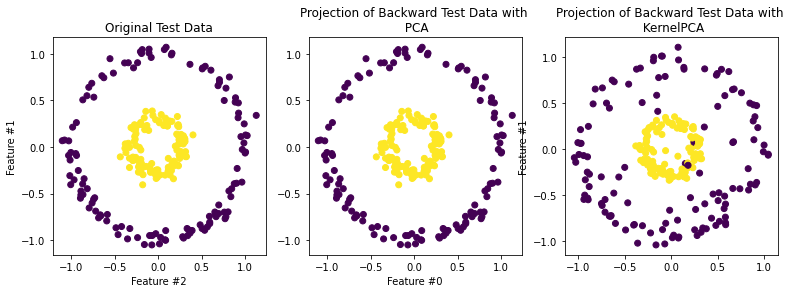

In [19]:
fig, (orig_data_ax, pca_back_proj_ax, kernel_pca_back_proj_ax) = plt.subplots(ncols = 3, figsize = (13, 4))

orig_data_ax.scatter(X_test[:, 0], X_test[:, 1], c = y_test)
orig_data_ax.set_ylabel("Feature #1")
orig_data_ax.set_xlabel("Feature #2")
orig_data_ax.set_title("Original Test Data")

pca_back_proj_ax.scatter(X_reconstructed_pca[:, 0], X_reconstructed_pca[:, 1], c = y_test)
pca_back_proj_ax.set_xlabel("Feature #0")
pca_back_proj_ax.set_title("Projection of Backward Test Data with \n PCA")

kernel_pca_back_proj_ax.scatter(X_reconstructed_kernel_pca[:, 0], X_reconstructed_kernel_pca[:, 1], c = y_test)
kernel_pca_back_proj_ax.set_ylabel("Feature #1")
kernel_pca_back_proj_ax.set_title("Projection of Backward Test Data with \n KernelPCA")

In [20]:
# Variance-Based Feature Selection
from sklearn.feature_selection import VarianceThreshold
X = [[0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 1], [0, 1, 0], [0, 1, 1]]
X

[[0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 1], [0, 1, 0], [0, 1, 1]]

In [21]:
sel = VarianceThreshold(threshold = (0.8 * (1 - 0.8))) # var = p(1-p)
sel.fit_transform(X)

array([[0, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 1]])

In [22]:
# Statisticle Model Selection
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X, y = load_iris(return_X_y = True)
X.shape

(150, 4)

In [23]:
X_new = SelectKBest(chi2, k = 2).fit_transform(X, y)
X_new.shape

(150, 2)

In [24]:
# Model-Based Feature Selection
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
X, y = load_iris(return_X_y = True)
X.shape

(150, 4)

In [25]:
# L1 Norm-Based Feature Selection
lsvc = LinearSVC(C = 0.01, penalty = "l1", dual = False).fit(X, y)
model = SelectFromModel(lsvc, prefit = True)
X_new = model.transform(X)
X_new.shape

(150, 3)

In [26]:
# L2 Norm-Based Feature Selection
lsvc = LinearSVC(C = 0.01, penalty = "l2", dual = False).fit(X, y)
model = SelectFromModel(lsvc, prefit = True)
X_new = model.transform(X)
X_new.shape

(150, 2)

In [27]:
# Tree-Based Feature Selection
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
X, y = load_iris(return_X_y = True)
X.shape

(150, 4)

In [28]:
clf = ExtraTreesClassifier(n_estimators = 50)
clf = clf.fit(X, y)
clf.feature_importances_

array([0.07048649, 0.04462375, 0.44326714, 0.44162262])

In [29]:
model = SelectFromModel(clf, prefit = True)
X_new = model.transform(X)
X_new.shape

(150, 2)

# Cross Validation

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [31]:
iris = load_iris()

x = iris.data # features
y = iris.target # class

In [32]:
# normalization
x = (x - np.min(x))/(np.max(x) - np.min(x))

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

Cross Validation with K-Nearest Neighbor Model

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3) # k = n_neighbors
knn

KNeighborsClassifier(n_neighbors=3)

In [35]:
# 10 fold cross validation
from sklearn.model_selection import cross_val_score
fold_num = 10
accuracies = cross_val_score(estimator = knn, X = x_train, y = y_train, cv = fold_num)

print("Avarage Accuracy: ", np.mean(accuracies))
print("Accuracy Standard Deviation: ", np.std(accuracies))

Avarage Accuracy:  0.9245454545454546
Accuracy Standard Deviation:  0.05560337703044736


Avarage Accuracy is 93% 

# Grid Search Cross Validation

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris = load_iris()

x = iris.data # features
y = iris.target # class

# normalization
x = (x - np.min(x))/(np.max(x) - np.min(x))

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3) # k = n_neighbors

from sklearn.model_selection import GridSearchCV
grid = {"n_neighbors" : np.arange(1,50)}
knn = KNeighborsClassifier()

knn_cv = GridSearchCV(knn, grid, cv = 10) # Grid search cross-validation
knn_cv.fit(x,y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [38]:
print("Best K Value: ", knn_cv.best_params_)
print("Best Accuracy Value by Best K Value", knn_cv.best_score_)

Best K Value:  {'n_neighbors': 13}
Best Accuracy Value by Best K Value 0.9800000000000001


Best parameters for Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression

grid = {"C" : np.logspace(-3, 3, 7), "penalty" : ["l1", "l2"]}

logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg, grid, cv = 10)
logreg_cv.fit(x,y)

print("Best Hperparameters : ",logreg_cv.best_params_)
print("Best Hyperparameters by Best Accuracy Value: ", logreg_cv.best_score_)

Best Hperparameters :  {'C': 1000.0, 'penalty': 'l2'}
Best Hyperparameters by Best Accuracy Value:  0.9800000000000001


C:\Users\ersin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ersin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

# Artificial Neural Network

In [40]:
# Defininng data set
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split

In [43]:
data_ = pd.read_csv("mnist_train.csv")
print("Data Size: ", data_.shape)
data_.head()

Data Size:  (60000, 785)


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
label_filter0 = 0
label_filter1 = 1
data_ = pd.concat([data_[data_["label"] == label_filter0], data_[data_["label"] == label_filter1]], axis = 1)
data_.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
Y_data = data_["label"]
X_data = data_.drop(["label"], axis = 1)
print("X Data: ", X_data.shape)
print("Y Data: ", Y_data.shape)

X Data:  (12665, 1568)
Y Data:  (12665, 2)


In [47]:
pic_size = int(np.sqrt(X_data.shape[1]))
pic_size

39

In [ ]:
# visualization of 0
pic1 = X_data.iloc[900].values
pic1 = pic1.reshape((pic_size, pic_size))
plt.imshow(pic1, cmap = "gray")
plt.axis('off')
plt.show()

In [ ]:
# visualization of 1
pic2 = X_data.iloc[8000].values
pic2 = pic2.reshape((pic_size, pic_size))
plt.imshow(pic2, cmap = "gray")
plt.axis('off')
plt.show()

In [48]:
x_train, x_test, y_train, y_test = train_test_split(X_data, Y_data, random_state = 42)
print("X train: ", x_train.shape)
print("X test: ", x_test.shape)

X train:  (9498, 1568)
X test:  (3167, 1568)


In [49]:
X_train = x_train.T
X_test = x_test.T
Y_train = y_train.values.reshape(-1, 1).T
Y_test = y_test.values.reshape(-1, 1).T
print("x train: ", X_train.shape)
print("x test: ", X_test.shape)
print("y train: ", Y_train.shape)
print("y test: ", Y_test.shape)

x train:  (1568, 9498)
x test:  (1568, 3167)
y train:  (1, 18996)
y test:  (1, 6334)


2 Layer Neural Network

In [50]:
# initialization
def initializaLayerParameters(X_train, Y_train):
    parameters = {"weight1" : np.random.randn(3, X_train.shape[0]) * 0.1,
                  "bias1" : np.zeros((3, 1)),
                  "weight2" : np.random.randn(Y_train.shape[0], 3) * 0.1,
                  "bias2" : np.zeros((Y_train.shape[0], 1))}
    return parameters
# sigmoid
def sigmoid(z):
    y_head = 1 / (1 + np.exp(-z))
    return y_head
sigmoid(0)

0.5

In [51]:
def forwardProp(X_train, parameters):
    
    Z1 = np.dot(parameters["weight1"], X_train) + parameters["bias1"]
    A1 = np.tanh(Z1)
    Z2 = np.dot(parameters["weight2"], X_train) + parameters["bias2"]
    A2 = np.tanh(Z2)
    
    cache = {"Z1" : Z1,
             "A1" : A1,
             "Z2" : Z2,
             "A2" : A2}
    return A2, cache

In [52]:
def costFunc(A2, Y, parameters):
    logprobs = np.multiply(np.log(A2), Y)
    cost = -np.sum(logprobs) / Y.shape[1]
    return cost

In [53]:
def backwardProp(parameters, cache, X, Y):
    dZ2 = cache["A2"] - Y
    dW2 = np.dot(dZ2, cache["A1"].T) / X.shape[1]
    db2 = np.sum(dZ2, axis = 1, keepdims = True) / X.shape[1]
    dZ1 = np.dot(parameters["weight2"].T, dZ2) * (1 - np.power(cache["A1"], 2))
    dW1 = np.dot(dZ1, X.T) / X.shape[1]
    db1 = np.sum(dZ1, axis = 1, keepdims = True) / X.shape[1]
    
    grads = {"dweight1" : dW1,
             "dbias1" : db1,
             "dweight2" : dW2,
             "dbias2" : db2}
    return grads

In [54]:
# update parameters
def updateParam(parameters, grads, learning_rate = 0.01):
    parameters = {"weight1" : parameters["weight1"] - learning_rate * grads["dweight1"],
                  "bias1" : parameters["bias1"] - learning_rate * grads["dbias1"],
                  "weight2" : parameters["weight2"] - learning_rate * grads["dweight2"],
                  "bias2" : parameters["bias2"] - learning_rate * grads["dbias2"]}
    return parameters

In [55]:
def predictionn(parameters, X_test):
    A2, cache = forwardProp(X_test, parameters)
    Y_prediction = np.zeros((1, X_test.shape[1]))
    
    for i in range(A2.shape[1]):
        if A2[0, i] <= 0.5:
            Y_prediction[0, i] = 0
        else:
            Y_prediction[0, i] = 1
    
    return Y_prediction

In [56]:
# 2-Layer neural network
def twolayer(X_train, Y_train, X_test, Y_test, num_iterations):
    cost_list = []
    index_list = []
    
    #initialization
    parameters = initializaLayerParameters(X_train, Y_train)
    
    for i in range(0, num_iterations):
        # forward propagation
        A2, cache = forwardProp(X_train, parameters)
        # cost func
        cost = costFunc(A2, Y_train, parameters)
        # backward propagation
        grads = backwardProp(parameters, cache, X_train, Y_train)
        # update parameters
        updateParam(parameters, grads)
        
        if i % 100 == 0:
            cost_list.append(cost)
            index_list.append(i)
            print("Iteration: %i, Cost: %f" %(i, cost))
    plt.plot(index_list, cost_list)
    plt.xticks(index_list, rotation = "vertical")
    plt.xlabel("Iteration Number")
    plt.ylabel("Cost")
    plt.show()
    
    # predict
    y_prediction_test = predictionn(parameters, X_test)
    y_prediction_train = predictionn(parameters, X_train)
    
    # accuracy
    print("Training Accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - Y_train)) * 100))
    print("Test Accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - Y_test)) * 100))
    
    return parameters

parameters = twolayer(X_train, Y_train, X_test, Y_test, num_iterations = 100)

ValueError: shapes (1,3) and (1568,9498) not aligned: 3 (dim 1) != 1568 (dim 0)